# Exploratory Analysis: Global Happiness Data

This notebook presents an exploratory analysis of global happiness data from the World Happiness Report (2019).
The objective is to identify key patterns and relationships between happiness scores and socio-economic factors
such as GDP per capita and social support, which later inform modeling decisions and data storytelling.

## Exploratory Questions

These questions guide the initial exploratory analysis and are intentionally broad, serving as a starting point before formal hypotheses are defined.

This exploratory analysis focuses on the following questions:

- How does overall happiness vary across countries and regions?
- Which socio-economic factors (e.g., GDP per capita, social support) show the strongest relationships with happiness scores?
- Are there visible patterns or outliers that suggest different country groupings or development profiles?
- Which variables appear most promising for further modeling and deeper analysis?

To address these questions, the analysis begins by loading and inspecting the 2019 World Happiness dataset to understand its structure and available variables.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Load and Preview the Data

We start by loading the 2019 World Happiness dataset from a CSV file.

`df.head()` displays the first 5 rows so we can confirm:
- the file loaded correctly,
- each row represents a country,
- the main columns (Score and the socio-economic indicators) are present.

In [2]:
df = pd.read_csv("../data/2019.csv")
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


The dataset contains one row per country, with overall happiness scores and several socio-economic indicators used to explain variations in reported well-being. Viewing the first few rows also helps verify that numeric variables are correctly formatted and suitable for subsequent exploratory and correlation-based analysis.

## Variable Selection for Exploratory Analysis

For the exploratory visual analysis, only relevant numeric variables were selected. Identifier and categorical variables (e.g., country name, overall rank) were excluded because they do not contribute to numerical relationship analysis.

In [3]:
from IPython.display import display

eda_df = df[
    [
        "Score",
        "GDP per capita",
        "Social support",
        "Healthy life expectancy",
        "Freedom to make life choices",
        "Generosity",
         "Perceptions of corruption",
    ]
]

display(eda_df.head())
display(eda_df.tail())

print("Data types and non-null counts:")
eda_df.info()

print("\nSummary statistics:")
display(eda_df.describe().T)

print("\nMissing values per column:")
display(eda_df.isna().sum().sort_values(ascending=False))

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298


,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
151,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,3.083,0.026,0.000,0.105,0.225,0.235,0.035
155,2.853,0.306,0.575,0.295,0.010,0.202,0.091


Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Score                         156 non-null    float64
 1   GDP per capita                156 non-null    float64
 2   Social support                156 non-null    float64
 3   Healthy life expectancy       156 non-null    float64
 4   Freedom to make life choices  156 non-null    float64
 5   Generosity                    156 non-null    float64
 6   Perceptions of corruption     156 non-null    float64
dtypes: float64(7)
memory usage: 8.7 KB

Summary statistics:


,count,mean,std,min,25%,50%,75%,max
Score,156.0,5.407096,1.113120,2.853,4.54450,5.3795,6.18450,7.769
GDP per capita,156.0,0.905147,0.398389,0.000,0.60275,0.9600,1.23250,1.684
Social support,156.0,1.208814,0.299191,0.000,1.05575,1.2715,1.45250,1.624
Healthy life expectancy,156.0,0.725244,0.242124,0.000,0.54775,0.7890,0.88175,1.141
Freedom to make life choices,156.0,0.392571,0.143289,0.000,0.30800,0.4170,0.50725,0.631
Generosity,156.0,0.184846,0.095254,0.000,0.10875,0.1775,0.24825,0.566
Perceptions of corruption,156.0,0.110603,0.094538,0.000,0.04700,0.0855,0.14125,0.453



Missing values per column:


Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

### Data Validation and Preparation

After selecting the relevant variables, several checks were performed to validate the dataset prior to analysis.

- `head()` and `tail()` were used to inspect the first and last rows of the dataset.
- `info()` was used to confirm that all selected variables are numeric (`float64`) and contain no missing values.
- `describe()` was used to examine summary statistics and value ranges.
- A missing-value check confirmed that no observations are missing across the selected variables.

Based on these checks, all selected variables are numeric, continuous, and measured on comparable scales, making them suitable for correlation analysis and visual exploration.

## Correlation Analysis

To quantify the strength and direction of relationships suggested by the exploratory visuals, a correlation matrix was computed for the selected numeric variables. Correlation coefficients range from -1 to +1, where values closer to +1 or -1 indicate stronger relationships.

It is important to note that correlation does not imply causation; these results are used to identify promising relationships rather than establish direct effects.

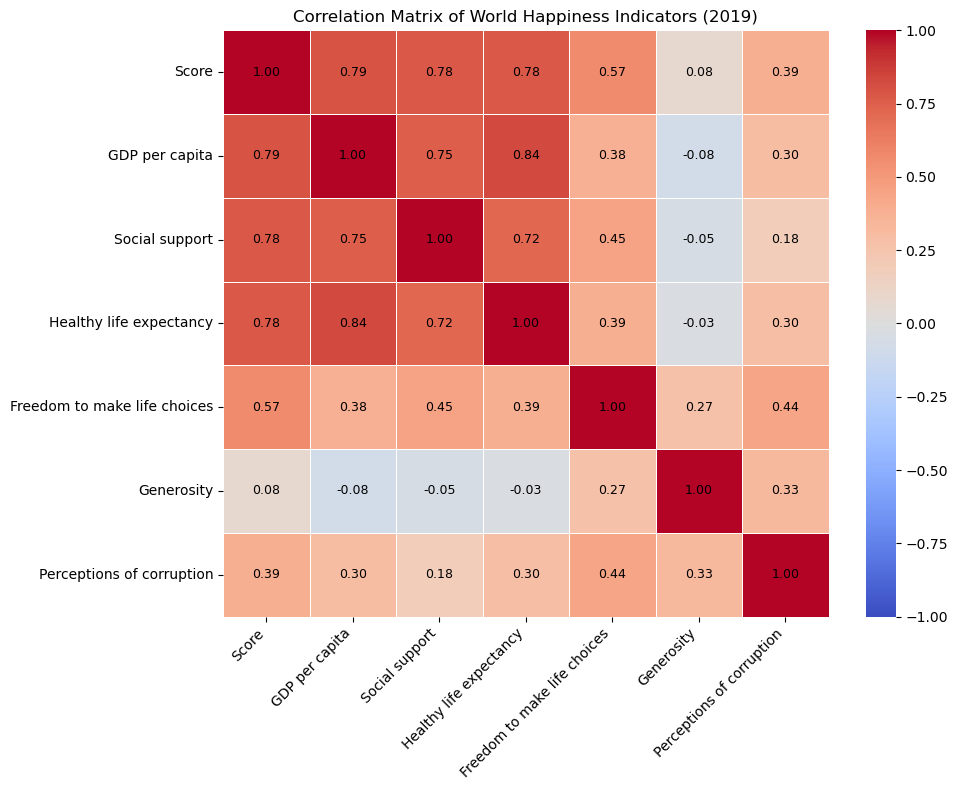

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

corr = eda_df.corr()

fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(
    corr,
    ax=ax,
    cmap="coolwarm",
    linewidths=0.5,
    vmin=-1, vmax=1,
    cbar=True
)

for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        ax.text(
            j + 0.5, i + 0.5,
            f"{corr.iloc[i, j]:.2f}",
            ha="center", va="center",
            fontsize=9,
            color="black"
        )

ax.set_title("Correlation Matrix of World Happiness Indicators (2019)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.tight_layout()
plt.show()

### Correlation Heatmap Interpretation

The heatmap shows strong positive correlations between the overall happiness score and GDP per capita, social support, and healthy life expectancy. This suggests that countries with stronger economic conditions, supportive social networks, and higher life expectancy tend to report higher happiness levels.

Freedom to make life choices shows a moderate positive relationship with happiness, indicating that personal autonomy contributes to well-being, though less strongly than economic and social factors.

Generosity exhibits a very weak correlation with happiness, suggesting that its direct linear relationship with overall happiness is limited. Perceptions of corruption show a moderate association, implying that lower perceived corruption may contribute to higher happiness, though it is not among the strongest predictors.

Overall, these correlations highlight that happiness is most closely associated with economic stability, social support, and health-related factors.

These correlations help identify which variables warrant further investigation using formal modeling techniques.

## Scatterplots of Key Relationships

Scatter plots are used to visually assess the form and strength of relationships between happiness scores and selected socio-economic indicators.

To further examine the nature of the strongest correlations identified in the heatmap, scatterplots were created to visualize the relationships between happiness score and selected predictors.

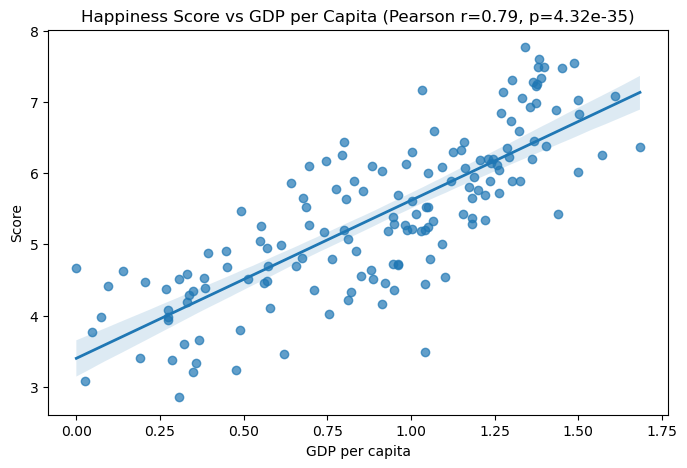

In [5]:
from scipy.stats import pearsonr

x = eda_df["GDP per capita"]
y = eda_df["Score"]

r, p = pearsonr(x, y)

plt.figure(figsize=(8, 5))
sns.regplot(
    x="GDP per capita",
    y="Score",
    data=eda_df,
    scatter_kws={"alpha": 0.7},
    line_kws={"linewidth": 2}
)
plt.title(f"Happiness Score vs GDP per Capita (Pearson r={r:.2f}, p={p:.3g})")
plt.show()

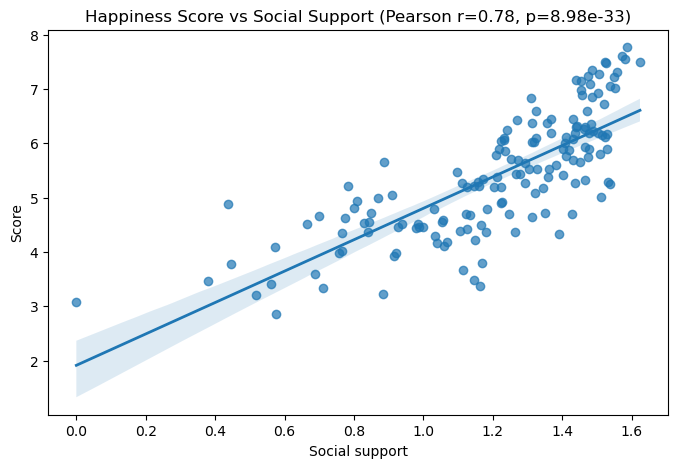

In [6]:
from scipy.stats import pearsonr

x = eda_df["Social support"]
y = eda_df["Score"]

r, p = pearsonr(x, y)

plt.figure(figsize=(8, 5))
sns.regplot(
    x="Social support",
    y="Score",
    data=eda_df,
    scatter_kws={"alpha": 0.7},
    line_kws={"linewidth": 2}
)
plt.title(f"Happiness Score vs Social Support (Pearson r={r:.2f}, p={p:.3g})")
plt.show()

### Scatterplot Interpretation

The scatterplot comparing happiness score and GDP per capita shows a clear positive relationship, which is supported by both the visual trend and the Pearson correlation coefficient. Countries with higher GDP per capita generally report higher happiness scores. However, the dispersion of data points indicates that economic prosperity alone does not fully explain variations in happiness, as countries with similar GDP levels can exhibit different happiness outcomes.

The scatterplot of happiness score versus social support reveals a strong positive and more tightly clustered relationship, reflected in a higher correlation coefficient. This suggests that social support is strongly associated with happiness and may play a particularly important role compared to economic indicators alone.

Overall, these scatterplots, together with the correlation analysis, reinforce the importance of both economic and social factors in shaping reported happiness levels, while remaining exploratory rather than causal.

## Pair Plot of Well-Being Indicators

A pair plot was created to visualize the distributions of each variable and the relationships between all pairs of selected well-being indicators.

In [7]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

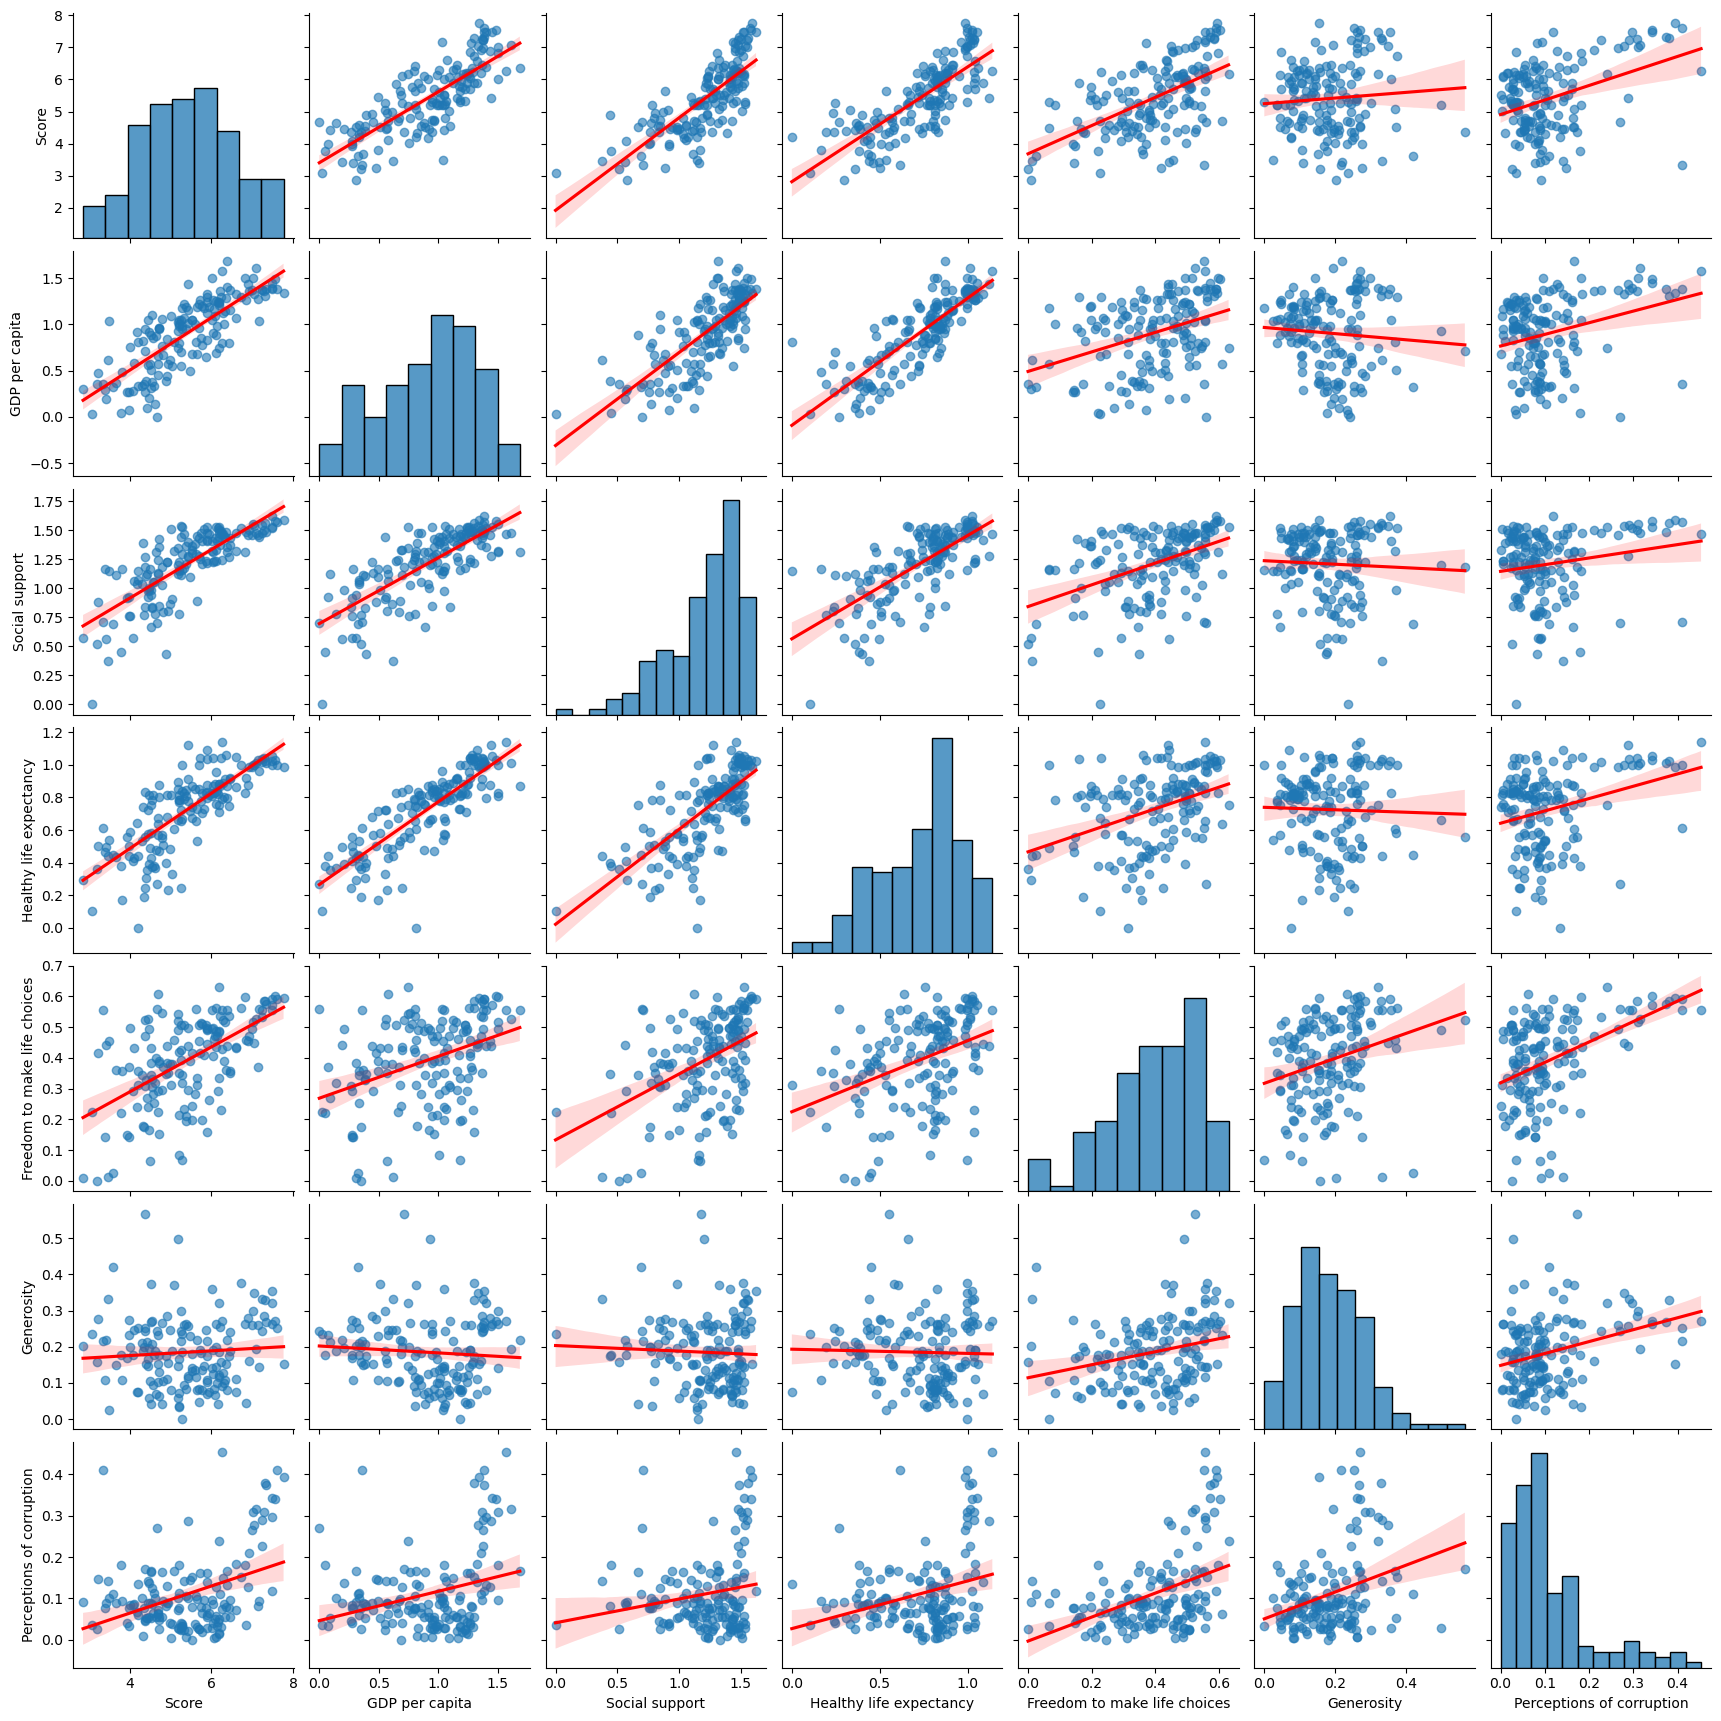

In [8]:
sns.pairplot(
    eda_df,
    kind="reg",
    diag_kind="hist",
    plot_kws={"line_kws": {"color": "red"}, "scatter_kws": {"alpha": 0.6}}
)
plt.show()

### Pair Plot Interpretation

The pair plot visualizes both the distributions of individual variables and the relationships between all selected well-being indicators. The diagonal plots indicate that happiness score and GDP per capita follow relatively smooth, unimodal distributions, while generosity and perceptions of corruption are more skewed, with many countries clustered at lower values.

Clear positive relationships are visible between happiness score and GDP per capita, social support, and healthy life expectancy. The fitted regression lines suggest that these relationships are relatively linear and consistent compared to other variable pairs, reinforcing their relevance in explaining cross-country differences in happiness.

Freedom to make life choices shows a moderate association with happiness but with greater dispersion, indicating that its influence may vary depending on broader social or institutional contexts. Generosity and perceptions of corruption exhibit weaker and more scattered relationships, suggesting more complex or indirect roles that warrant further investigation.

## Categorical Analysis of Happiness Levels

To further explore differences between groups of countries, happiness scores were categorized into low, medium, and high happiness levels. A categorical plot was created to examine how GDP per capita varies across these groups.

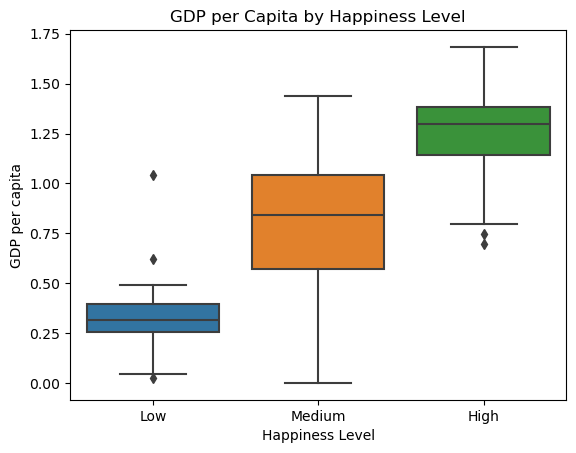

In [9]:
df["Happiness Level"] = pd.cut(
    df["Score"],
    bins=[0, 4, 6, 8],
    labels=["Low", "Medium", "High"]
)

sns.boxplot(
    x="Happiness Level",
    y="GDP per capita",
    data=df
)
plt.title("GDP per Capita by Happiness Level")
plt.show()

### Categorical Plot Interpretation

The categorical plot shows that countries classified as having high happiness levels tend to have higher median GDP per capita compared to countries in the medium and low happiness groups. This suggests that economic prosperity is an important differentiating factor between happiness categories.

However, the overlap between categories indicates that GDP per capita alone does not fully determine happiness levels. Some countries with moderate GDP per capita still achieve relatively high happiness scores, reinforcing the role of social and health-related factors identified earlier.

## Key Insights from Exploratory Analysis

**1. Which economic and social factors show the strongest association with overall happiness scores across countries?**  
The exploratory analysis indicates that GDP per capita, social support, and healthy life expectancy show the strongest associations with happiness scores. These variables consistently displayed strong positive correlations and clear patterns across multiple visualizations.

**2. How does GDP per capita relate to happiness when compared with non-economic factors such as social support and freedom of choice?**  
GDP per capita shows a strong positive relationship with happiness; however, social support demonstrates an equally strong and in some cases more tightly clustered relationship. Freedom to make life choices shows a moderate association, suggesting that non-economic factors play a crucial complementary role in shaping happiness.

**3. Are there identifiable patterns or clusters of countries based on similar well-being profiles?**  
While distinct clusters were not formally identified at this stage, the visualizations suggest that countries with high happiness scores tend to share similar profiles characterized by higher GDP per capita, stronger social support, and longer healthy life expectancy.

**4. To what extent do perceptions of corruption and generosity contribute to variations in happiness scores?**  
Generosity shows a weak relationship with happiness, indicating limited direct influence. Perceptions of corruption exhibit a moderate association with happiness, suggesting that lower perceived corruption may contribute to higher happiness levels, though the relationship is less consistent than for economic and social indicators.

## Preliminary Hypotheses

Based on the patterns observed during exploratory analysis, the following hypotheses are formulated for subsequent modeling and validation.

**H1:** Countries with higher GDP per capita tend to have higher overall happiness scores.

**H2:** Social support is positively associated with happiness scores and may show a stronger relationship with happiness than economic indicators alone.

**H3:** Higher healthy life expectancy is positively associated with higher happiness scores across countries.

**H4:** Lower perceptions of corruption are associated with higher happiness scores, although this relationship is weaker than that of economic and social factors.

**H5:** Generosity shows a weak association with happiness scores and is not a primary explanatory factor compared to other well-being indicators.